<a href="https://colab.research.google.com/github/TestimonyAdeyemi/Spotify-Data-Analysis/blob/main/Spotify_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set-up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.min_rows', 20)

In [ ]:
f = open('spotify-2023.csv', encoding='utf-8', errors='ignore')
songs = pd.read_csv(f)

In [126]:
songs.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,count_tracks
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,1
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,7
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,34
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,19
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,Major,92,66,58,19,0,8,24,1
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,Minor,67,83,76,48,0,8,3,1
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,F,Major,67,26,71,37,0,11,4,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,C#,Minor,85,22,62,12,0,28,9,1
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,81,56,48,21,0,8,33,1


Looking at the data, these are the questions we can answer
1. The artist with the most songs on the top 100 most streamed songs
2. The number of songs with 1,2,3 artists on the top 100 songs most streamed songs
3. The most common release year on the top 100 songs most streamed songs
4. Top 10 Most streamed songs
5. Most common release month on the list
6. Energy level across the top 100 list
7. Speachiness level across the top 100 list
8. The most reoccuring key on the top 100 list
9. Dancebility across the list
10. What features correlate the most with the ranking?

<ipython-input-146-fbe04b6190fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['int_streams'] = pd.to_numeric(songs['streams'], errors='coerce')
<ipython-input-146-fbe04b6190fa>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp5['ranking'] = range(1, len(temp5) + 1)
<ipython-input-146-fbe04b6190fa>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

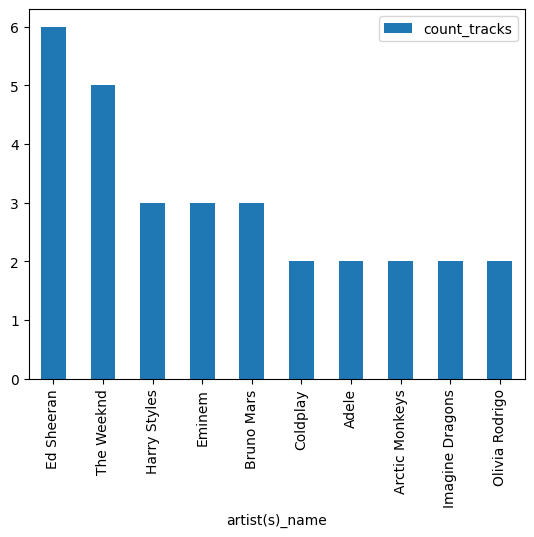

In [146]:
#1. The artists with the most top 100 most streamed songs

temp2 = songs[['track_name', 'streams', 'artist_count', 'artist(s)_name', 'released_year', 'released_month', 'energy_%', 'speechiness_%','key', 'danceability_%', 'bpm', 'valence_%', 'acousticness_%']]
temp2['int_streams'] = pd.to_numeric(songs['streams'], errors='coerce')
temp2[temp2.streams.astype('str').str.isnumeric()]
temp3 = temp2.dropna(subset=['streams'])
temp4 = temp3.sort_values(['int_streams'], ascending=[False])

temp5 = temp4.head(100)
temp5['ranking'] = range(1, len(temp5) + 1)


temp5['count_tracks'] = temp5.groupby('artist(s)_name')['artist(s)_name'].transform('count')
temp6 = temp5[['artist(s)_name', 'count_tracks']]
temp7 = temp6.sort_values(['count_tracks'], ascending=[False]).drop_duplicates(subset='artist(s)_name', keep='first')
temp7.head(10)


#Graph
temp7.head(10).plot.bar('artist(s)_name', 'count_tracks')
plt.show()



In [ ]:
#2.The number of collaborations in the songs of the top 100 most streamed songs

temp5.groupby('artist_count')['track_name'].count().plot.bar()
plt.show()

In [ ]:
#3. The most common release year on the top 100 songs most streamed songs
temp5.groupby('released_year')['track_name'].count().plot.bar()
plt.show()


In [125]:
#4. Top 10 Most streamed songs
temp5.head(10)

,track_name,streams,artist_count,artist(s)_name,released_year,released_month,int_streams,ranking,count_tracks
55,Blinding Lights,3703895074,1,The Weeknd,2019,11,3.703895e+09,1,5
179,Shape of You,3562543890,1,Ed Sheeran,2017,1,3.562544e+09,2,6
86,Someone You Loved,2887241814,1,Lewis Capaldi,2018,11,2.887242e+09,3,2
620,Dance Monkey,2864791672,1,Tones and I,2019,5,2.864792e+09,4,1
41,Sunflower - Spider-Man: Into the Spider-Verse,2808096550,2,"Post Malone, Swae Lee",2018,10,2.808097e+09,5,1
162,One Dance,2713922350,3,"Drake, WizKid, Kyla",2016,4,2.713922e+09,6,1
84,STAY (with Justin Bieber),2665343922,2,"Justin Bieber, The Kid Laroi",2021,7,2.665344e+09,7,1
140,Believer,2594040133,1,Imagine Dragons,2017,1,2.594040e+09,8,2
725,Closer,2591224264,2,"The Chainsmokers, Halsey",2016,5,2.591224e+09,9,1
48,Starboy,2565529693,2,"The Weeknd, Daft Punk",2016,9,2.565530e+09,10,1


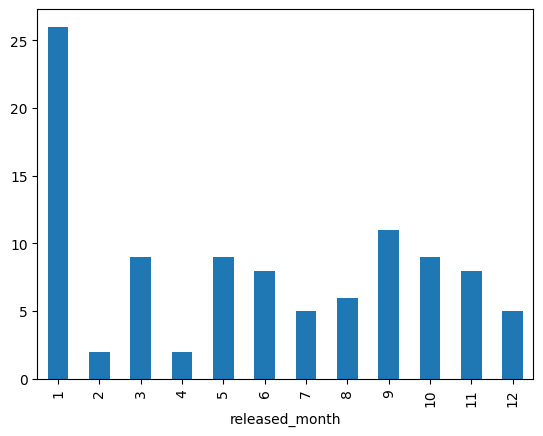

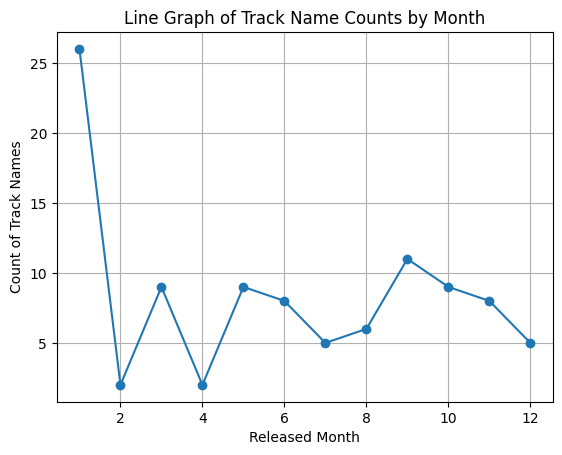

In [124]:
#5. Most common release month on the list

temp5.groupby('released_month')['track_name'].count().plot.bar()
plt.show()

temp5.groupby('released_month')['track_name'].count().plot(kind='line', marker='o', linestyle='-')
plt.xlabel('Released Month')
plt.ylabel('Count of Track Names')
plt.title('Line Graph of Track Name Counts by Month')
plt.grid(True)
plt.show()

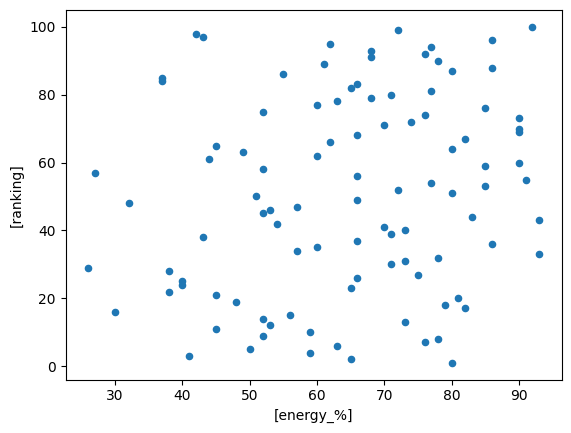

In [129]:
#6. Energy level across the top 100 list
temp5.plot.scatter(['energy_%'],['ranking'])
plt.show()

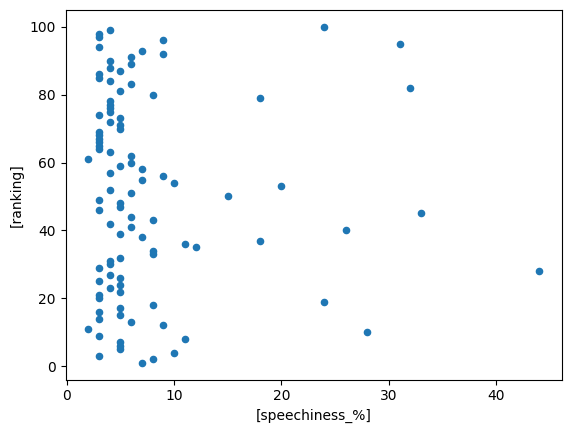

In [133]:
#7. Speachiness level across the top 100 list
temp4.head(10)

temp5.plot.scatter(['speechiness_%'],['ranking'])
plt.show()

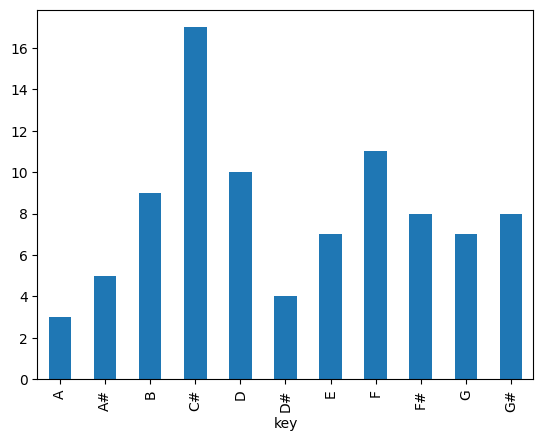

In [136]:
# 8. The most reoccuring key on the top 100 list
temp5.groupby('key')['track_name'].count().plot.bar()
plt.show()


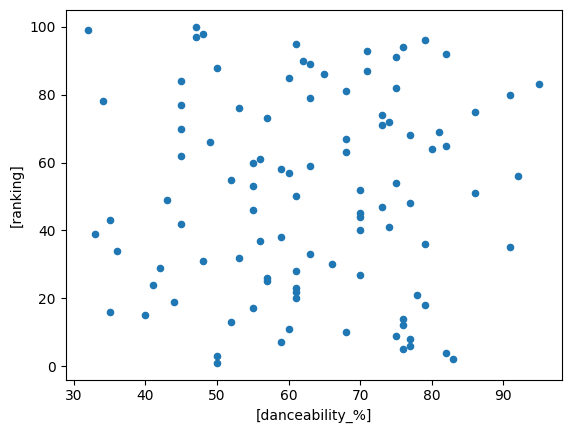

In [137]:
#9. Dancebility across the list


temp5.plot.scatter(['danceability_%'],['ranking'])
plt.show()

In [150]:
#10. What features correlate the most with the ranking?


# cities.plot.scatter('latitude', 'temperature')
# a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = ax + b
# x1 = min(cities.latitude)
# x2 = max(cities.latitude)
# plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
# plt.show()


r = np.corrcoef(temp5['int_streams'], temp5['energy_%'])[1, 0]
print('Correlation coefficient between streams and energy_%:', r)

r = np.corrcoef(temp5['int_streams'], temp5['danceability_%'])[1, 0]
print('Correlation coefficient between streams and danceability_%:', r)

r = np.corrcoef(temp5['int_streams'], temp5['speechiness_%'])[1, 0]
print('Correlation coefficient between streams and speechiness_%:', r)

r = np.corrcoef(temp5['int_streams'], temp5['bpm'])[1, 0]
print('Correlation coefficient between streams and bpm:', r)

r = np.corrcoef(temp5['int_streams'], temp5['acousticness_%'])[1, 0]
print('Correlation coefficient between streams and acousticness_%:', r)

r = np.corrcoef(temp5['int_streams'], temp5['valence_%'])[1, 0]
print('Correlation coefficient between streams and valence_%:', r)



Correlation coefficient between streams and energy_%: -0.17639926407396514
Correlation coefficient between streams and danceability_%: 0.008095566898963192
Correlation coefficient between streams and speechiness_%: 0.008872922013984832
Correlation coefficient between streams and bpm: -0.0986033134839152
Correlation coefficient between streams and acousticness_%: 0.16642223468895745
Correlation coefficient between streams and valence_%: 0.007367577324698505
